## Visualization Data

### Importing Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import warnings
warnings.filterwarnings("ignore")

### Loading dataset and data info

In [82]:
data = pd.read_csv(r'fashion-mnist_train.csv')
data.head()


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
0      2       0       0       0       0       0       0       0       0  \
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0       0  ...         0         0         0         0         0         0  \
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [84]:
len(data['label'].unique())

10

### Define labels and check quantity per label
- 0 - T-shirt/top
- 1 - Trouser
- 2 - Pullover
- 3 - Dress
- 4 - Coat
- 5 - Sandal
- 6 - Shirt
- 7 - Sneaker
- 8 - Bag
- 9 - Ankle boot

In [85]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

label_counts = data['label'].value_counts()
total_samples = len(data)
for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


**3.Visualizing the Data:**

Chuẩn hóa dữ liệu (MIM/MAX)

Các giá trị cột 784 pixel trong mỗi hàng chứa thông tin độ sáng cho từng pixel trong hình ảnh thang độ xám 28x28. Độ sáng của pixel được lưu dưới dạng số nguyên 8 bit, nằm trong khoảng từ 0 (màu đen) đến 255 (màu trắng). Các giá trị ở giữa đại diện cho các sắc thái khác nhau của màu xám. Do đó, để chuẩn hóa các giá trị, chúng ta cần chia mỗi ô pixel cho 255.

In [86]:
# Save the data points as 'input_data'
input_data = data.iloc[:,1:] / 255
# Check the shape of the input data
print('Shape of the input data',input_data.shape)
# Preview a few rows
input_data.head()

Shape of the input data (60000, 784)


pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8   
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000  \
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
0     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000  \
1     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   
2     0.0      0.0  ...  0.000000       0.0       0.0  0.117647  0.168627   
3     0.0      0.0  ...  0.011765       0.0       0.0  0.000000  0.000000   
4     0.0      0.0  ...  0.000000       0.0       0.0  0.000000  0.000000   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0  0.000000       0.0       0.0       0.0       0.0  
1  0.000000       0.0       0.0       0.0       0.0  
2  0.000000       0.0       0.0       0.0       0.0  
3  0.003922       0.0       0.0       0.0       0.0  
4  0.000000       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [87]:
# Save the label(in 0-9 format) as 'target'
target = data[['label']].iloc[:, :]
# Check the shape of the label/category
print('Shape of the input label', target.shape)
# Preview a few rows
target.head()

Shape of the input label (60000, 1)


label
0      2
1      9
2      6
3      0
4      3

**3.1 Visualize the training images**

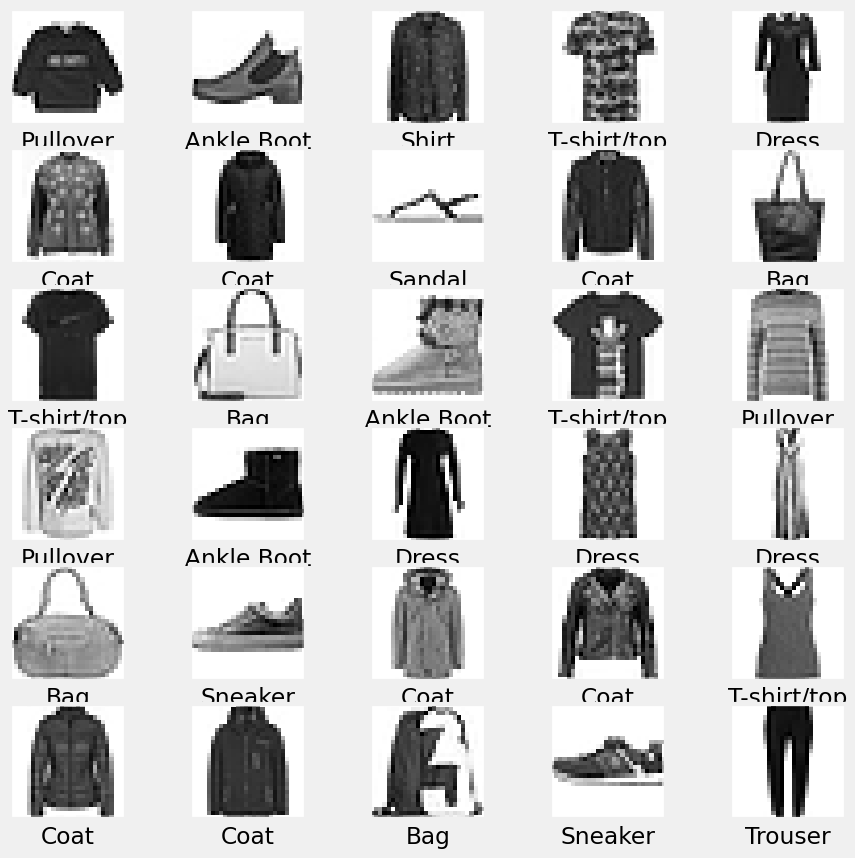

In [88]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(input_data.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[target.label.iloc[i]])

3.2 Visualize using Principal Component Analysis(PCA)


Phép phân tích thành phần chính (Principal Components Analysis - PCA) là một thuật toán thống kê sử dụng phép biến đổi trực giao để biến đổi một tập hợp dữ liệu từ một không gian nhiều chiều sang một không gian mới ít chiều hơn (2 hoặc 3 chiều) nhằm tối ưu hóa việc thể hiện sự biến thiên của dữ liệu.

In [89]:
from __future__ import print_function
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [90]:
# Give multiple pixel columns one name: features
features = ['pixel' + str(i+1) for i in range(input_data.shape[1]) ]
# Create a new DataFrame df
pca_df = pd.DataFrame(input_data, columns=features)
# Add an additional column 'y', identical with label values in data
pca_df['label'] = target['label']

print('Size of the dataframe: {}'.format(pca_df.shape))

Size of the dataframe: (60000, 785)


In [91]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(pca_df.shape[0]):
    # Extract the label for comparison
    if pca_df['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif pca_df['label'][i] == 1:
        results.append('Trouser')
    elif pca_df['label'][i] == 2:
        results.append('Pullover')
    elif pca_df['label'][i] == 3:
        results.append('Dress')
    elif pca_df['label'][i] == 4:
        results.append('Coat')
    elif pca_df['label'][i] == 5:
        results.append('Sandal')
    elif pca_df['label'][i] == 6:
        results.append('Shirt')
    elif pca_df['label'][i] == 7:
        results.append('Sneaker')
    elif pca_df['label'][i] == 8:
        results.append('Bag')
    elif pca_df['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
pca_df['result'] = results

In [92]:
pca_df = pca_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [93]:
# Set first three principle components
pca = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca.fit_transform(pca_df[features].values)

In [94]:
pca_result.shape

(60000, 3)

In [95]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29011353 0.17727668 0.060227  ]


In [96]:
pca_df['First Dimension'] = pca_result[:,0]
pca_df['Second Dimension'] = pca_result[:,1] 
pca_df['Third Dimension'] = pca_result[:,2]

In [97]:
pca_df.head()

pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8   
0     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000  \
1     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3     0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

   pixel9  pixel10  ...  pixel780  pixel781  pixel782  pixel783  pixel784   
0     0.0      0.0  ...  0.000000       0.0       0.0       0.0       0.0  \
1     0.0      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
2     0.0      0.0  ...  0.000000       0.0       0.0       0.0       0.0   
3     0.0      0.0  ...  0.003922       0.0       0.0       0.0       0.0   
4     0.0      0.0  ...  0.000000       0.0       0.0       0.0       0.0   

   label       result  First Dimension  Second Dimension  Third Dimension  
0      2     Pullover         3.686333          4.960529        -0.051232  
1      9   Ankle boot        -4.376434          3.861059        -1.949433  
2      6        Shirt         7.265152          1.568757         2.315239  
3      0  T-shirt/top         3.227788         -2.325256        -0.649303  
4      3        Dress         4.146373         -4.039080        -1.515247  

[5 rows x 789 columns]

Text(0.5, 0.98, '2-Component PCA')

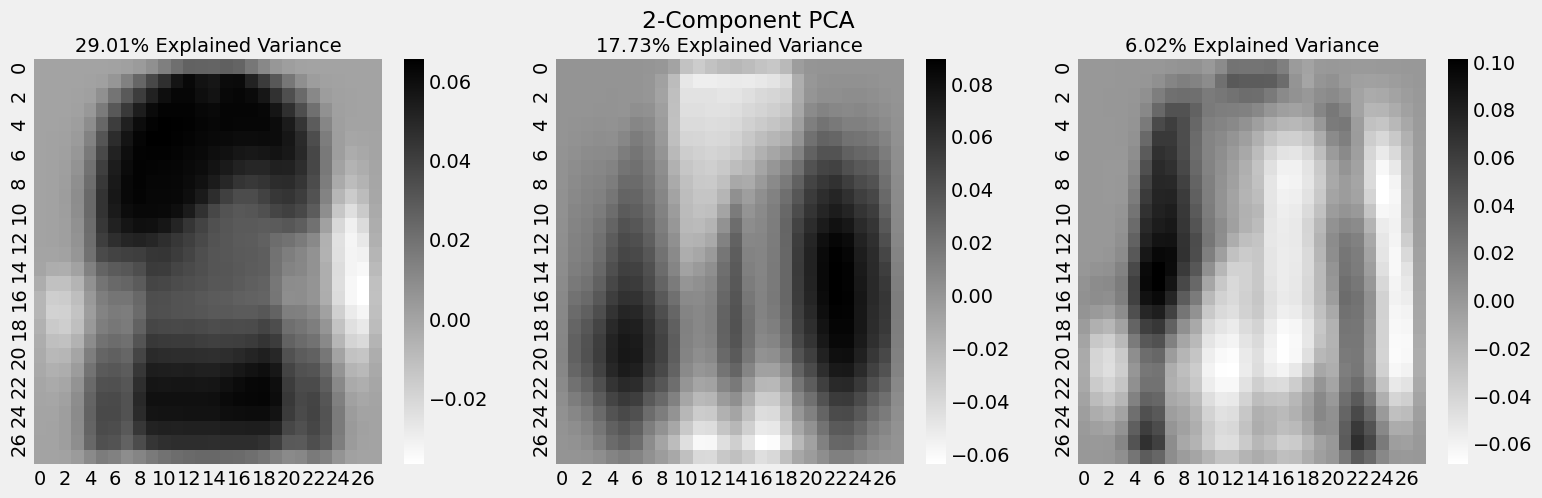

In [98]:
# Set the graph style as 'fivethirtyeight'
plt.style.use('fivethirtyeight')
#Set figure size
fig, axarr = plt.subplots(1, 3, figsize=(17, 5))
# use seaborn heatmap to visualize the first three pca components
sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap=plt.cm.binary)
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap=plt.cm.binary)
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[2], cmap=plt.cm.binary)
# Set picture title to explained variance
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize=14)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize=14)
axarr[2].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize=14)    
# Add picture title
plt.suptitle('2-Component PCA')

- The first dimension giải thích 29% dữ liệu pixel và các biến thể bên trong trông như T-Shirt và Shoe.
- The second dimension giải thích khoảng 18% dữ liệu pixel và các biến thể bên trong trông như Trouser và Pullover.
- The third dimension giải thích khoảng 6% dữ liệu pixel và các biến thể bên trong trông như Pullover và Ankle boot.

In [99]:
# initializing the pca
# Set n_components as 784 dimensions
pca = decomposition.PCA(n_components = 784)
# Fit on training data
pca_784 = pca.fit_transform(pca_df[features].values)
#percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)

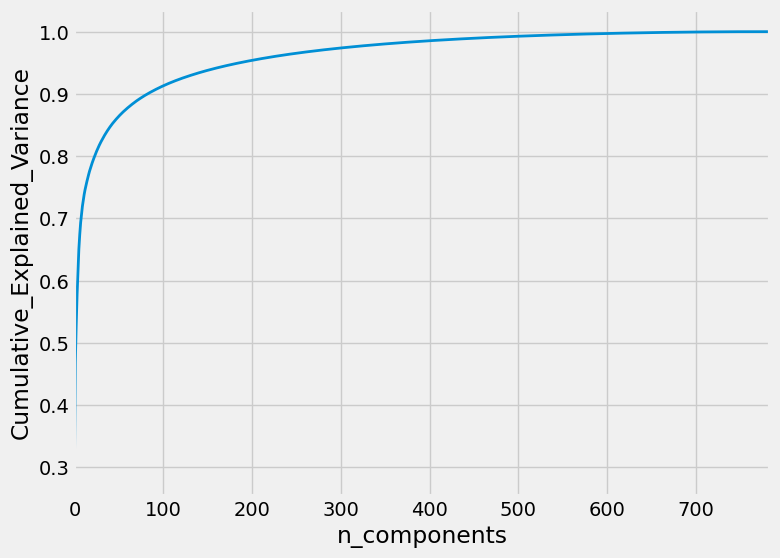

In [100]:
# Plot the PCA spectrum
plt.figure(figsize=(8, 6))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.xlim(0, 784)
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

<Axes: xlabel='First Dimension', ylabel='Second Dimension'>

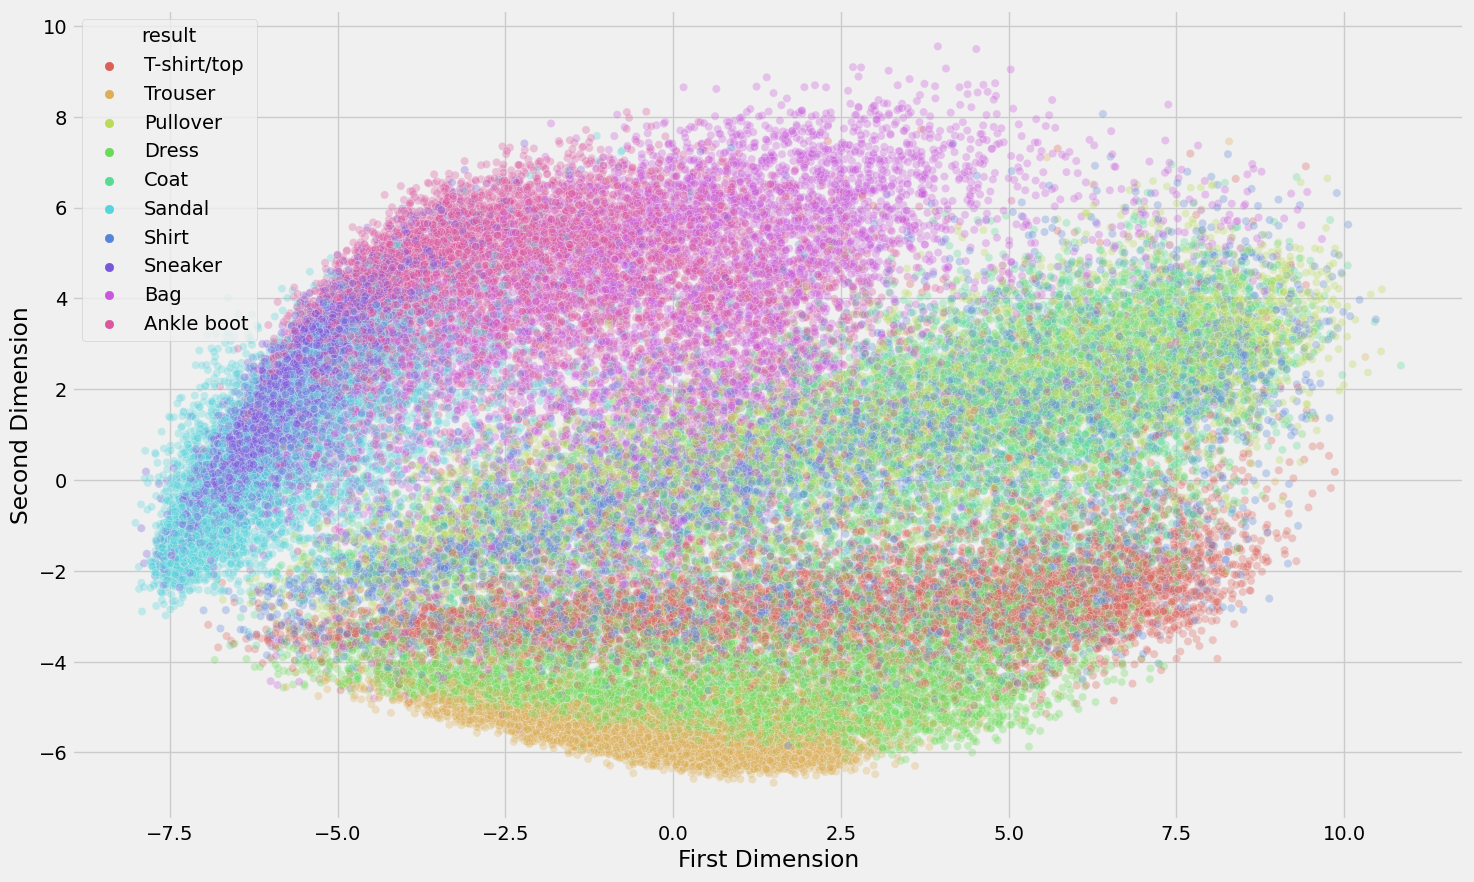

In [101]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Dimension", y="Second Dimension",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

Từ biểu đồ trên, chúng ta có thể thấy 2 components có thể tách biệt các loại khác nhau ở một mức độ nào đó, nhưng sự tách biệt không đủ rõ ràng.

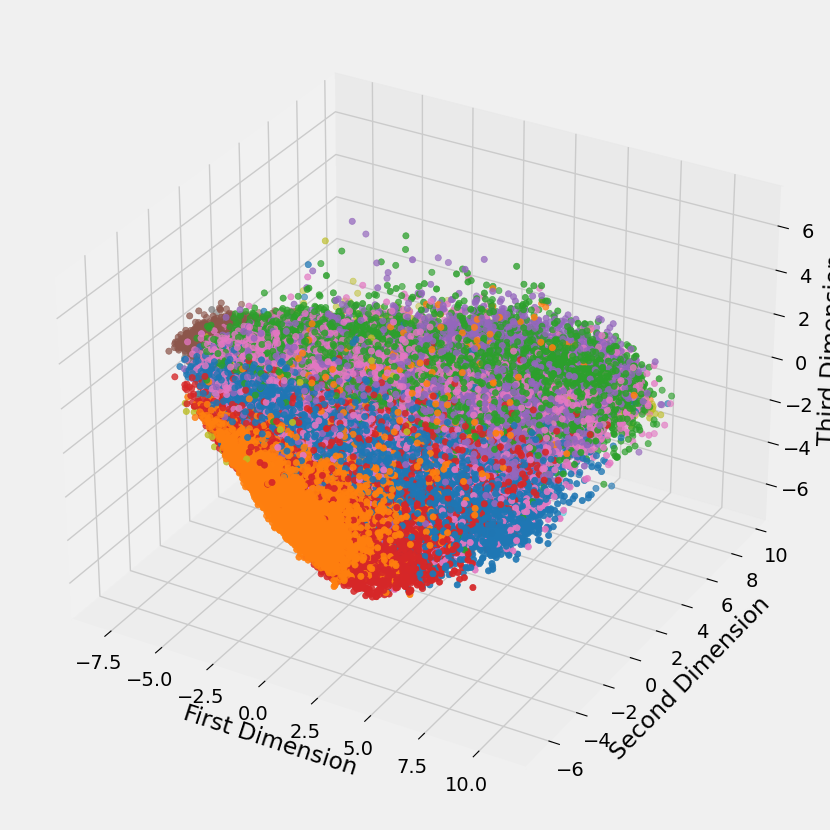

In [102]:
fig = plt.figure(figsize=(16,10))
graph = fig.add_subplot(projection='3d')
graph.scatter(
    xs=pca_df["First Dimension"], 
    ys=pca_df["Second Dimension"], 
    zs=pca_df["Third Dimension"], 
    c=pca_df["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

Hình ảnh ba chiều cũng không thể tách biệt đầy đủ các danh mục. Chúng ta cần một kỹ thuật hiệu quả hơn.

3.3 Visualize using t-Distributed Stochastic Neighbouring Entities

t-Distributed Stochastic Neighbouring Entities (t-SNE) là một thuật toán học máy có thể giảm số lượng chiều hiệu quả hơn.Phương pháp này đặc biệt tốt cho việc trực quan hóa các bộ dữ liệu đa chiều.

In [103]:
# Create a random generator, so to decreases potential biases in the data
rand = np.random.permutation(pca_df.shape[0])

In [104]:
# Pull 60000 pictures out of the sample
N = 60000
pca_df_subset = pca_df.loc[rand[:N],:].copy()
data_subset = pca_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
pca_df_subset['First Dimension'] = pca_result[:,0]
pca_df_subset['Second Dimension'] = pca_result[:,1] 
pca_df_subset['Third Dimension'] = pca_result[:,2]
print('Explained variation in each principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation in each principal component: [0.29011353 0.17727668 0.060227  ]


In [105]:
# Keep track of time elapsed in the method
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.053s...
[t-SNE] Computed neighbors for 60000 samples in 84.865s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

<Axes: xlabel='t-SNE First Dimension', ylabel='t-SNE Second Dimension'>

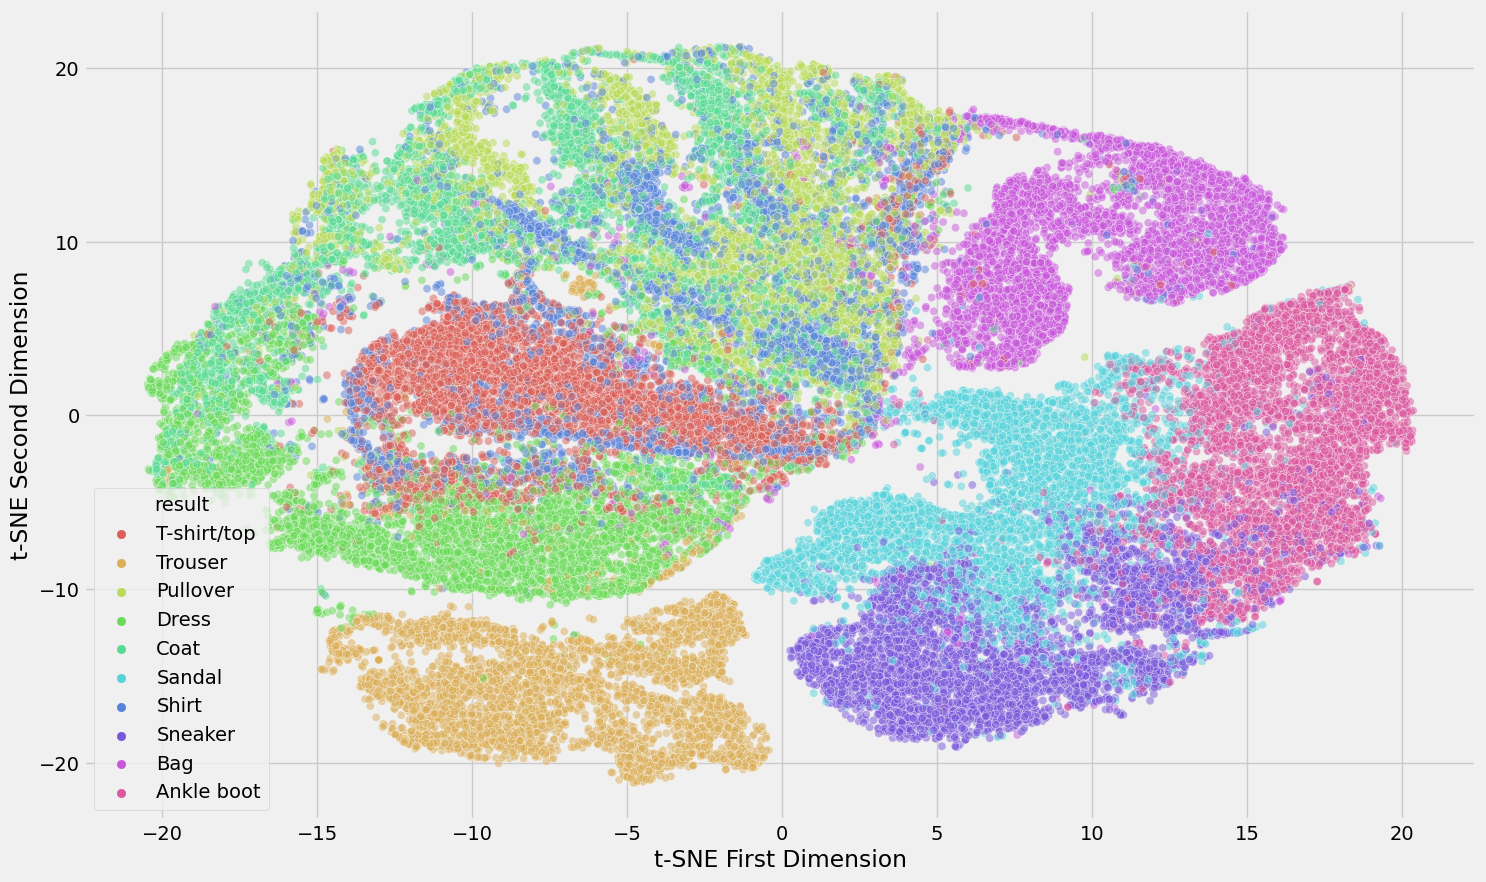

In [106]:
pca_df_subset['t-SNE First Dimension'] = tsne_results[:,0]
pca_df_subset['t-SNE Second Dimension'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE First Dimension", y="t-SNE Second Dimension",
    hue="result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=pca_df_subset,
    legend="full",
    alpha=0.5
)